### Homework 3.5 - Noise Reduction

We will try to reduce audio noise using the Fourier trick I shown in the lecture.

In this problem, you will have to make a short record of about 5-10 seconds with a auditable background noise. The source of noise can be fan, air condition, etc. Make sure the noise is constant throughout the audio so that we can easily pick up the noise in the frequency domain.

Be careful the copyrighted materials.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

In [6]:
import numpy as np
import matplotlib.pyplot as plt

### Extract the data of audio in form of an array

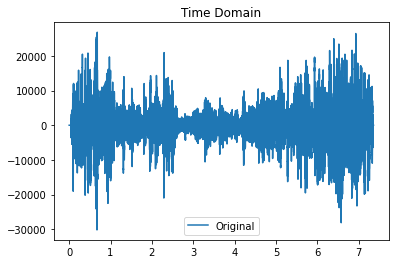

In [7]:
from scipy.io import wavfile
freq, y = wavfile.read('images/all_i_want_for_christmas.wav')
dt = 1/freq
t = np.linspace(0, (len(y)-1)*dt, len(y))
plt.plot(t, y, label='Original')
plt.title('Time Domain')
plt.legend()

### FFT the data to look at frequency domain

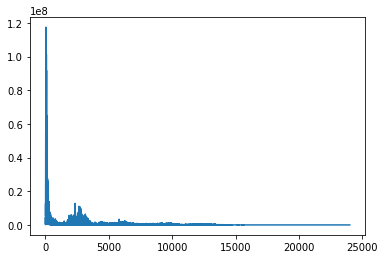

In [38]:
from scipy.fft import rfft,rfftfreq,irfft

n = len(t)
yf = rfft(y)
xf = rfftfreq(n, dt)

plt.plot(xf, np.abs(yf))

### Find the mask that cover the peak (cut the noises)

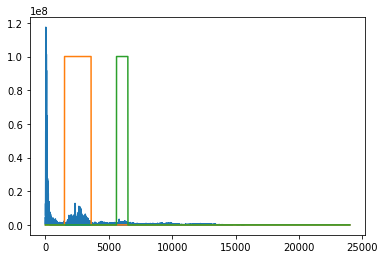

In [63]:
mask1 = np.where(np.logical_and(xf >1500,xf < 3600),1,0)
mask2 = np.where(np.logical_and(xf >5600,xf < 6500),1,0)
mask = np.logical_or(mask1, mask2)
plt.plot(xf, np.abs(yf))
plt.plot(xf, mask1*1e8)
plt.plot(xf, mask2*1e8)

### Multiply the mask with data in frequency domain

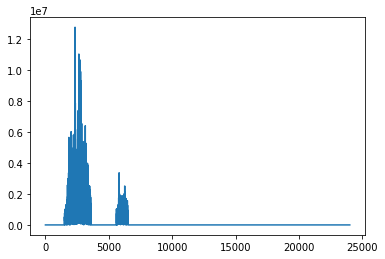

In [64]:
yf_clean = yf*mask
plt.plot(xf, np.abs(yf_clean))

### Invert data back to time domain

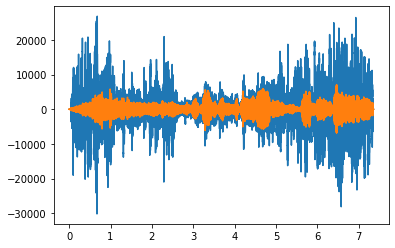

In [65]:
new_f_clean = irfft(yf_clean)
plt.plot(t, y)
plt.plot(t, new_f_clean)

In [67]:
wavfile.write('images/noise_reduced_all_i_want_for_christmas.wav', freq, np.array(new_f_clean, dtype=np.int16))